In [1]:
#the next task is make a prediction grid
#meshgrid
#enumerate
import numpy as np
import scipy.stats as ss
from scipy.stats import mode as moda
import matplotlib.pyplot as plt

In [9]:
p1=np.array([1,2])
p2=np.array([2,3])



1.4142135623730951

In [42]:
def majority_vote_short(votes):
    """Return the most common vote in the secuence"""
    mode,couts=moda(votes)
    return mode



def distance(p1,p2):
    """find the distance between p1 and p2"""
    return np.sqrt(np.sum(np.power(p2-p1,2)))




def find_nearest_neighbors(p,points,k=5):
    """Find the k nearest neighbors of p and return their indices"""
    distances=np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i]=distance(p,points[i])
    ind=np.argsort(distances)
    return ind[:k]

In [55]:

def knn_predict(p,points,outcomes,k=5):
    
    #encontramos sus vecinos más cercanos
    ind=find_nearest_neighbors(p,points,k)
    #vemos que valor aparece más veces de estos indices en outcomes aparecen más veces
    return majority_vote_short(outcomes[ind])
    

In [56]:
def generate_synth_data(n=50):
    """Create two sets of points from bivariate normal distribution"""
    points=np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(0,1).rvs((n,2))),axis=0)
    outcomes=np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points,outcomes)
    

In [57]:
def make_prediction_grid(predictors,outcomes,limits,h,k):
    """Classify each point the prediction grid"""
    (x_min,x_max,y_min,y_max)=limits
    xs=np.arange(x_min,x_max,h)
    ys=np.arange(y_min,y_max,h)
    xx,yy=np.meshgrid(xs,ys)
    
    prediction_grid=np.zeros(xx.shape,dtype=int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p=np.array([x,y])
            prediction_grid[j,i]=knn_predict(p,predictors,outcomes,k)
    return (xx,yy,prediction_grid)

In [58]:
(predictors,outcomes)=generate_synth_data()

In [79]:
k=5;filename="knn_synth_5.pdf"; limits=(-3,4,-3,4); h=0.1

In [80]:
(xx,yy,prediction_grid) = make_prediction_grid(predictors,outcomes,limits,h,k);

In [97]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

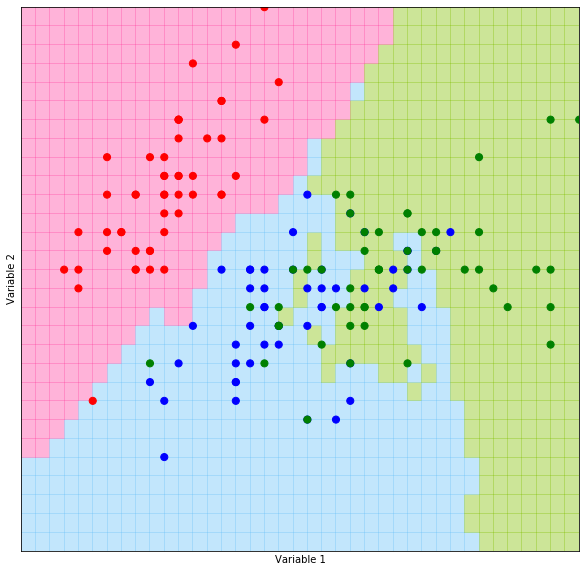

In [98]:
plot_prediction_grid(xx,yy,prediction_grid,filename)

In [84]:
##aplicacion con el dataset iris

In [85]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [86]:
iris=datasets.load_iris()

In [87]:
predictors=iris.data[:,0:2]
outcomes=iris.target

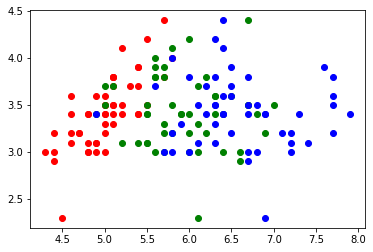

In [88]:
plt.plot(predictors[outcomes==0][:,0],predictors[outcomes==0][:,1],"ro") # graficando su altura con respecto a su anchura
plt.plot(predictors[outcomes==1][:,0],predictors[outcomes==0][:,1],"go") # graficando su altura con respecto a su anchura
plt.plot(predictors[outcomes==2][:,0],predictors[outcomes==0][:,1],"bo") # graficando su altura con respecto a su anchura
plt.savefig("IRIS.pdf")


In [89]:
k=5;filename="iris_grid.pdf"; limits=(4,8,1.5,4.5); h=0.1

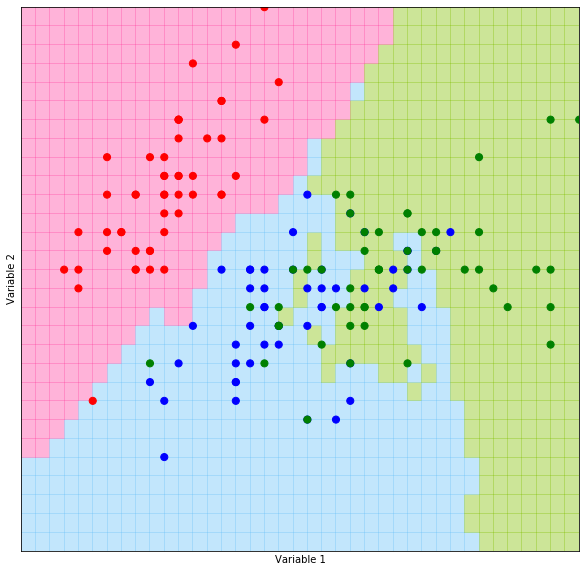

In [90]:
(xx,yy,prediction_grid) = make_prediction_grid(predictors,outcomes,limits,h,k);
plot_prediction_grid(xx,yy,prediction_grid,filename)

In [99]:
# aplicando el clafisicador de sklear

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
knn=KNeighborsClassifier(n_neighbors=5)

In [102]:
knn.fit(predictors,outcomes)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [103]:
sk_predictions=knn.predict(predictors)

In [104]:
sk_predictions.shape

(150,)

In [106]:
sk_predictions[:10] ## cladifica perfectamente por quepredecimos con los mismos valores que entrenamos

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [120]:
##predicciones con nuestro algoritmo casero, usando la data de sklear
my_predictions=np.array([knn_predict(p,predictors,outcomes,5) for p in predictors])

In [121]:
my_predictions

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
    

In [122]:
#comparacion de las predicciones
(np.mean(sk_predictions==my_predictions))*100

33.324444444444445

In [123]:
#tambien podemos ver, con qué frecuencia mis predicciones son igualesz a los resultados

In [125]:
#sklearn
print(100*np.mean(sk_predictions==outcomes))

#me
print(100*np.mean(my_predictions==outcomes))

83.33333333333334
33.33333333333333
